# I. Import necessary libraries

In [23]:
#import needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV #for cross validation

#models used
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.ensemble import StackingClassifier
#neural network
from keras.models import Sequential
from keras.layers import Dense

In [3]:
df = pd.read_csv('./ckd_data.csv')
df.head()

,Bp,Sg,Al,Su,Rbc,Bu,Sc,Sod,Pot,Hemo,Wbcc,Rbcc,Htn,Class
0,80.0,1.020,1.0,0.0,1.0,36.0,1.2,137.53,4.63,15.4,7800.0,5.20,1.0,1
1,50.0,1.020,4.0,0.0,1.0,18.0,0.8,137.53,4.63,11.3,6000.0,4.71,0.0,1
2,80.0,1.010,2.0,3.0,1.0,53.0,1.8,137.53,4.63,9.6,7500.0,4.71,0.0,1
3,70.0,1.005,4.0,0.0,1.0,56.0,3.8,111.00,2.50,11.2,6700.0,3.90,1.0,1
4,80.0,1.010,2.0,0.0,1.0,26.0,1.4,137.53,4.63,11.6,7300.0,4.60,0.0,1


# II. Examine Data set



In [4]:
df.shape

(400, 14)

In [ ]:
#sample size is fairly small at only 400

In [6]:
df.describe()

,Bp,Sg,Al,Su,Rbc,Bu,Sc,Sod,Pot,Hemo,Wbcc,Rbcc,Htn,Class
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,76.455000,1.017712,1.015000,0.395000,0.882500,57.40550,3.07235,137.529025,4.627850,12.526900,8406.090000,4.708275,0.369350,0.625000
std,13.476536,0.005434,1.272329,1.040038,0.322418,49.28597,5.61749,9.204273,2.819783,2.716171,2523.219976,0.840315,0.482023,0.484729
min,50.000000,1.005000,0.000000,0.000000,0.000000,1.50000,0.40000,4.500000,2.500000,3.100000,2200.000000,2.100000,0.000000,0.000000
25%,70.000000,1.015000,0.000000,0.000000,1.000000,27.00000,0.90000,135.000000,4.000000,10.875000,6975.000000,4.500000,0.000000,0.000000
50%,78.000000,1.020000,1.000000,0.000000,1.000000,44.00000,1.40000,137.530000,4.630000,12.530000,8406.000000,4.710000,0.000000,1.000000
75%,80.000000,1.020000,2.000000,0.000000,1.000000,61.75000,3.07000,141.000000,4.800000,14.625000,9400.000000,5.100000,1.000000,1.000000
max,180.000000,1.025000,5.000000,5.000000,1.000000,391.00000,76.00000,163.000000,47.000000,17.800000,26400.000000,8.000000,1.000000,1.000000


In [7]:
#check and if missing values need to clean dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Bp      400 non-null    float64
 1   Sg      400 non-null    float64
 2   Al      400 non-null    float64
 3   Su      400 non-null    float64
 4   Rbc     400 non-null    float64
 5   Bu      400 non-null    float64
 6   Sc      400 non-null    float64
 7   Sod     400 non-null    float64
 8   Pot     400 non-null    float64
 9   Hemo    400 non-null    float64
 10  Wbcc    400 non-null    float64
 11  Rbcc    400 non-null    float64
 12  Htn     400 non-null    float64
 13  Class   400 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 43.9 KB


In [14]:
#break down column info
info = ["Blood Pressure",
        "Specific Graviy",
        "Albumin",
        "Sugar",
        "Red Blood Cell 1 - abnormal, 0 - normal",
        "Blood Urea",
        "Serum Creatinine",
        "Sodium",
        "Potassium",
        "Hemoglobin",
        "White Blood Cell Count"
        "Red Blood Cell Count",
        "Hypertension"]

for i in range(len(info)):
    print(df.columns[i]+":\t\t"+info[i])

Bp:		Blood Pressure
Sg:		Specific Graviy
Al:		Albumin
Su:		Sugar
Rbc:		Red Blood Cell 1 - abnormal, 0 - normal
Bu:		Blood Urea
Sc:		Serum Creatinine
Sod:		Sodium
Pot:		Potassium
Hemo:		Hemoglobin
Wbcc:		White Blood Cell CountRed Blood Cell Count
Rbcc:		Hypertension


In [15]:
#examine target column
df["Class"].unique()

array([1, 0])

0 and 1 indicates classification where 1 = hypertension , 0 = healthy

Check correlations between column and target

In [18]:
pd.set_option('display.float_format', lambda x: '%.6f' % x)
print(df.corr()["Class"].abs().sort_values(ascending=False))

Class   1.000000
Hemo    0.729537
Sg      0.659504
Al      0.598389
Rbcc    0.590248
Htn     0.586340
Bu      0.371982
Sod     0.342268
Su      0.294555
Sc      0.294076
Bp      0.290145
Rbc     0.282642
Wbcc    0.205266
Pot     0.077063
Name: Class, dtype: float64


We see fairly high correlations for Hemo and Sg but Pot has very low correlation

# III. Exploratory Data Analysis



Analyze target column

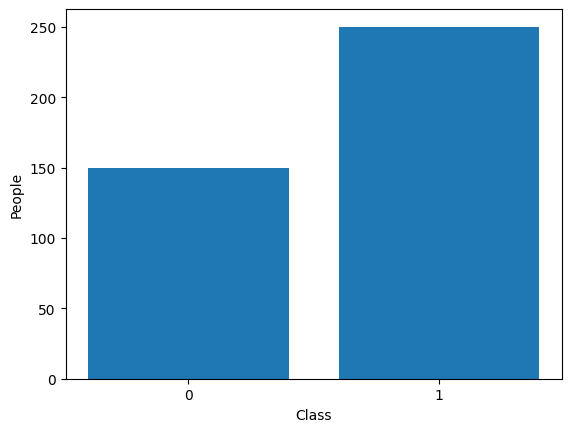

pecent of patients with CKD:  62.5
pecent of patients without CKD:  37.5


In [19]:
total = len(df)
disease = len(df[df['Class'] ==1])
healthy = len(df[df['Class']== 0])

plt.bar(['0','1'],[healthy, disease])
plt.xlabel('Class')
plt.ylabel('People')
plt.show()

disease = round((disease/total)*100, 2)
healthy = round((healthy/total)*100, 2)
print('pecent of patients with CKD: ', disease)
print('pecent of patients without CKD: ', healthy)

In [ ]:
# data skewed towards those with CKD

1. Hemo and Sg

In [33]:
#define colors to be used in scatter plot classification
colors = {0: 'blue', 1: "red"}
color_list = [colors[group] for group in df['Class']]

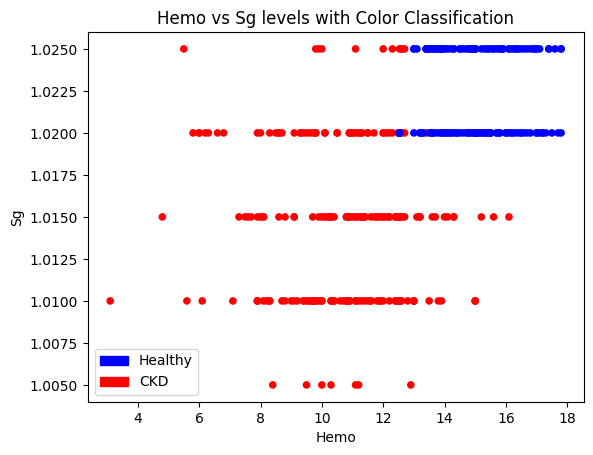

In [34]:
ax = df.plot.scatter(
    x='Hemo',
    y='Sg',
    c=color_list, # Pass the color list to the 'c' argument
    title='Hemo vs Sg levels with Color Classification'
)

legend_handles = [
    mpatches.Patch(color=colors[0], label='Healthy'),
    mpatches.Patch(color=colors[1], label='CKD')
]
ax.legend(handles=legend_handles)
plt.show()

In [35]:
# we see that those without CKD have higher Hemo and SG levels

2. Bu and Rbcc

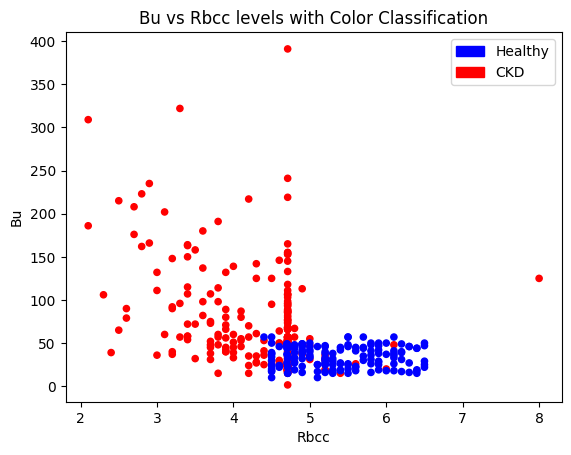

In [47]:
ax = df.plot.scatter(
    x='Rbcc',
    y='Bu',
    c=color_list, # Pass the color list to the 'c' argument
    title='Bu vs Rbcc levels with Color Classification'
)

legend_handles = [
    mpatches.Patch(color=colors[0], label='Healthy'),
    mpatches.Patch(color=colors[1], label='CKD')
]
ax.legend(handles=legend_handles)
plt.show()


In [48]:
# we see that the lower the Blood urine and
# higher the Rbcc the less likely it is for
# people to have CKD

3. Al and Htn

In [45]:
df['Htn'] = df['Htn'].round(0)

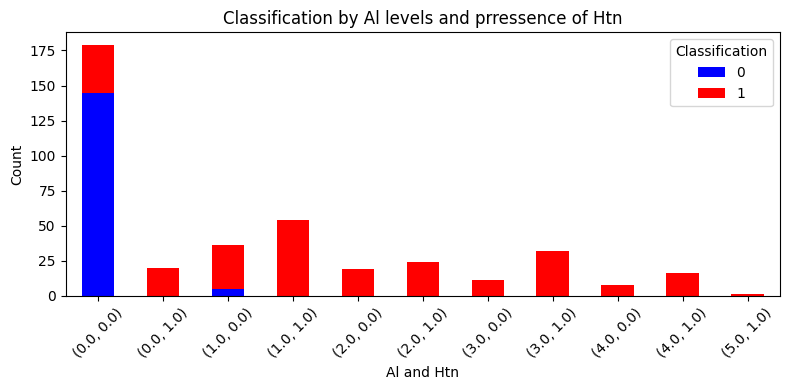

In [65]:
grouped_data = df.groupby(['Al', 'Htn', 'Class']).size().unstack(fill_value=0)

fig, ax = plt.subplots(figsize=(8, 4))


grouped_data.plot(kind='bar', stacked=True, ax=ax, cmap='bwr')

# 4. Customize the Plot
ax.set_title('Classification by Al levels and prressence of Htn')
ax.set_xlabel('Al and Htn')
ax.set_ylabel('Count')
ax.tick_params(axis='x', rotation=45) # Rotate x-axis labels for better readability
ax.legend(title='Classification')

plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

In [ ]:
# we see that lower AL and no hyper tension means a paitient is less
# likely to have CKD

4. Sod an Su

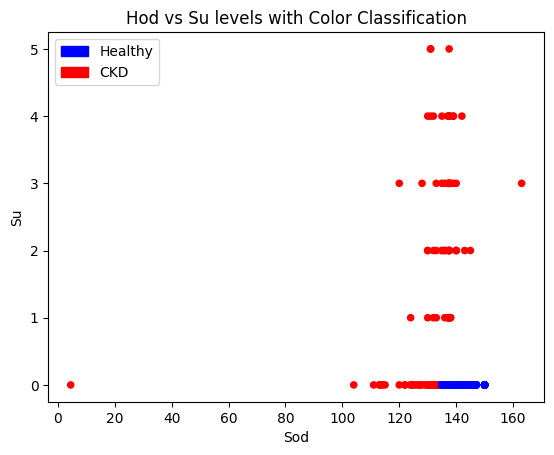

In [68]:
ax = df.plot.scatter(
    x='Sod',
    y='Su',
    c=color_list, # Pass the color list to the 'c' argument
    title='Hod vs Su levels with Color Classification'
)

legend_handles = [
    mpatches.Patch(color=colors[0], label='Healthy'),
    mpatches.Patch(color=colors[1], label='CKD')
]
ax.legend(handles=legend_handles)
plt.show()

In [ ]:
# we a uniique outlier in the bottom left, and generally see higher Sod
# and lower Su has less liklihood of having CKD

In [ ]:
# in general we can see that if we were to classify based on some of these
# pairs of variables we see strong correlations and can classify based
# on the region the point is in on the graph

# IV Train-Test Split

In [69]:
#since each feature is differeny, measures different things, and has differeny scales
# we might normalize the data depending model (like knn, logistic reg, or gradient descent, NN)

features = df.drop("Class",axis=1)
target = df["Class"]

scaler = MinMaxScaler()
norm_features = scaler.fit_transform(features)


In [89]:
# split the data into training and test data
X_train,X_test,Y_train,Y_test = train_test_split(features,target,test_size=0.30,random_state=0)

Xn_train = scaler.fit_transform(X_train)
Xn_test = scaler.fit_transform(X_test)

In [90]:
print(X_train.shape, Xn_train.shape)
print(X_test.shape, Xn_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(280, 13) (280, 13)
(120, 13) (120, 13)
(280,)
(120,)


# V. Model Fitting

1. Logistic Regression

In [92]:
#using normalized data
lr_norm = LogisticRegression()

lr_norm.fit(Xn_train,Y_train)

lr_Yn_pred = lr_norm.predict(Xn_test)

In [91]:
#using raw data
lr = LogisticRegression()

lr.fit(X_train,Y_train)

lr_pred = lr.predict(X_test)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [93]:
#calculate and compare score
lr_norm_acc = round(accuracy_score(lr_Yn_pred,Y_test)*100,2)
lr_acc = round(accuracy_score(lr_pred,Y_test)*100,2)

print(f"The accuracy score achieved using Logistic Regression (normalized data) is: {lr_norm_acc} %")
print(f"The accuracy score achieved using Logistic Regression is: {lr_acc} %")

The accuracy score achieved using Logistic Regression (normalized data) is: 97.5 %
The accuracy score achieved using Logistic Regression is: 95.83 %


In [94]:
# slightly better with normalized data
# with more data there could be more variance and outliers thus normalization would
# become more necessary

2. KNN

In [95]:
# we must determine the amount of neigbors to use
param_grid = {
        'n_neighbors': list(range(1, 16)),  # Explore k from 1 to 15
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    }

knn = KNeighborsClassifier()
knn_norm = KNeighborsClassifier()

#using 5 fold cross validation
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search_norm = GridSearchCV(knn_norm, param_grid, cv=5, scoring='accuracy')



In [96]:
#fit data
grid_search.fit(X_train, Y_train)
grid_search_norm.fit(Xn_train, Y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [97]:
# retrieve models
best_knn_norm_model = grid_search_norm.best_estimator_
best_norm_params = grid_search_norm.best_params_
best_norm_score = grid_search_norm.best_score_

best_knn_model = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best norm parameters: {best_norm_params}")
print(f"Best norm cross-validation accuracy: {best_norm_score:.4f}")
print(f"Best parameters: {best_params}")
print(f"Best cross-validation accuracy: {best_score:.4f}")

Best norm parameters: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
Best norm cross-validation accuracy: 0.9857
Best parameters: {'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}
Best cross-validation accuracy: 0.7107


In [98]:
#predict and score
knn_Yn_pred=best_knn_norm_model.predict(Xn_test)
knn_Y_pred=best_knn_model.predict(X_test)

knn_norm_acc = round(accuracy_score(knn_Yn_pred,Y_test)*100,2)
knn_acc = round(accuracy_score(knn_Y_pred,Y_test)*100,2)

print(f"The accuracy score achieved using KNN(norm) is: {knn_norm_acc} %")
print(f"The accuracy score achieved using KNN is: {knn_acc} %")

The accuracy score achieved using KNN(norm) is: 98.33 %
The accuracy score achieved using KNN is: 74.17 %


In [99]:
# we see similar acccuracy compared to the previous model with normalized having
# a mucch higher percent correct

3. XGBoost

In [100]:
# doesn't need normalization, random state is set so results are consistent
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, Y_train)

xgb_Y_pred = xgb_model.predict(X_test)

In [101]:
xgb_acc = round(accuracy_score(xgb_Y_pred,Y_test)*100,2)

print(f"The accuracy score achieved using XGBoost is: {xgb_acc} %")

The accuracy score achieved using XGBoost is: 100.0 %


In [102]:
# 100% accuracy, interesting to see if this holds up with introduction of new data
# since perfect accuracy is near impossible, overfitting?

4. Decision Tree

In [103]:
#no normalization is necessary
dt = DecisionTreeClassifier()
dt.fit(X_train,Y_train)
dt_Y_pred = dt.predict(X_test)

In [104]:
dt_acc = round(accuracy_score(dt_Y_pred,Y_test)*100,2)

print(f"The accuracy score achieved using Decision Tree is: {dt_acc} %")

The accuracy score achieved using Decision Tree is: 98.33 %


In [106]:
# high accuracy, can set random_state for reproducibility

5. Random Forest

In [107]:
#no normalization is necessary
rf = RandomForestClassifier()
rf.fit(X_train,Y_train)
rf_Y_pred = rf.predict(X_test)

In [108]:
rf_acc = round(accuracy_score(rf_Y_pred,Y_test)*100,2)

print(f"The accuracy score achieved using Decision Tree is: {rf_acc} %")

The accuracy score achieved using Decision Tree is: 100.0 %


In [109]:
# 100% accuracy is seen again just like in XGBoost

6. SVM

In [113]:
#using normalized data
sv_norm = svm.SVC(kernel='linear', )
sv_norm.fit(Xn_train, Y_train)
svm_norm_Y_pred = sv_norm.predict(Xn_test)

In [114]:
#using raw data
sv = svm.SVC(kernel='linear')
sv.fit(X_train, Y_train)
svm_Y_pred = sv.predict(X_test)

In [115]:
#compare scores
svm_norm_acc = round(accuracy_score(svm_norm_Y_pred,Y_test)*100,2)
svm_acc = round(accuracy_score(svm_Y_pred,Y_test)*100,2)

print(f"The accuracy score achieved using Linear SVM(Norm) is: {svm_norm_acc} %")
print(f"The accuracy score achieved using Linear SVM is: {svm_acc} %")

The accuracy score achieved using Linear SVM(Norm) is: 97.5 %
The accuracy score achieved using Linear SVM is: 95.83 %


In [116]:
# we see the affects of scaling again as scaled data results in
# slightly higher accuracy for SVM

7. Naive Bayes

In [117]:
# probability based so no normalization needed
nb = GaussianNB()
nb.fit(X_train,Y_train)

nb_Y_pred = nb.predict(X_test)

In [118]:
nb_acc = round(accuracy_score(nb_Y_pred,Y_test)*100,2)

print(f"The accuracy score achieved using Naive Bayes is: {nb_acc} %")

The accuracy score achieved using Naive Bayes is: 91.67 %


In [119]:
#lower accuracy than the other models

8. Stack (meta: xgboost, ensemble: KNN, RF, LR)

In [120]:
#chose arbitrarily but tried too make base models diverse and have xgboost as final decision maker

# Define base models
base_models = [
    ('dt', DecisionTreeClassifier()),
    ('knn', KNeighborsClassifier()),
    ('LR', LogisticRegression())
]

# Define meta-model
meta_model = xgb.XGBClassifier()

In [121]:
# Create and fit the StackingClassifier
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)
stacking_clf.fit(Xn_train, Y_train) #used normalized data

StackingClassifier(cv=5,
                   estimators=[('dt', DecisionTreeClassifier()),
                               ('knn', KNeighborsClassifier()),
                               ('LR', LogisticRegression())],
                   final_estimator=XGBClassifier(base_score=None, booster=None,
                                                 callbacks=None,
                                                 colsample_bylevel=None,
                                                 colsample_bynode=None,
                                                 colsample_bytree=None,
                                                 device=None,
                                                 early_stopping_rounds=None,
                                                 enable_categorical=False,
                                                 eval_metric=None,...
                                                 feature_weights=None,
                                                 gamma=None, grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=None,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
                                                 max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 multi_strategy=None,
                                                 n_estimators=None, n_jobs=None,
                                                 num_parallel_tree=None, ...))

In [122]:
stack_Y_pred = stacking_clf.predict(Xn_test)
stack_acc = round(accuracy_score(stack_Y_pred,Y_test)*100,2)

print(f"The accuracy score achieved using the Stack Ensemble is: {stack_acc} %")

The accuracy score achieved using the Stack Ensemble is: 97.5 %


In [123]:
# we see that the stack actually perfomed worse on the test set than
# some of the individual models

9. Neural Network

In [124]:
model = Sequential()
model.add(Dense(11,activation='relu',input_dim=13))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [125]:
X_train.shape

(280, 13)

In [127]:
model.fit(X_train,Y_train,epochs=300, batch_size=16)

Epoch 1/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8142 - loss: 0.8261
Epoch 2/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8073 - loss: 0.7648
Epoch 3/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8023 - loss: 0.7854
Epoch 4/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7905 - loss: 1.1511  
Epoch 5/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7222 - loss: 1.6455
Epoch 6/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7897 - loss: 1.1250
Epoch 7/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7558 - loss: 1.5263
Epoch 8/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7730 - loss: 1.6859
Epoch 9/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8018 - loss: 1.1984
Epoch 10/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7402 - loss: 1.2835
Epoch 11/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7914 - loss: 0.9062
Epoch 12/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc

In [128]:
nn_Y_pred = model.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


In [129]:
rounded = [round(x[0]) for x in nn_Y_pred]
nn_Y_pred = rounded

In [130]:
nn_acc = round(accuracy_score(nn_Y_pred,Y_test)*100,2)

print(f"The accuracy score achieved using Neural Network is: {nn_acc} %")

The accuracy score achieved using Neural Network is: 92.5 %


In [131]:
# only 92.5% acc but maybe model can be improved by adding/altering layers
# or increasing number of epochs.

#VI. Results

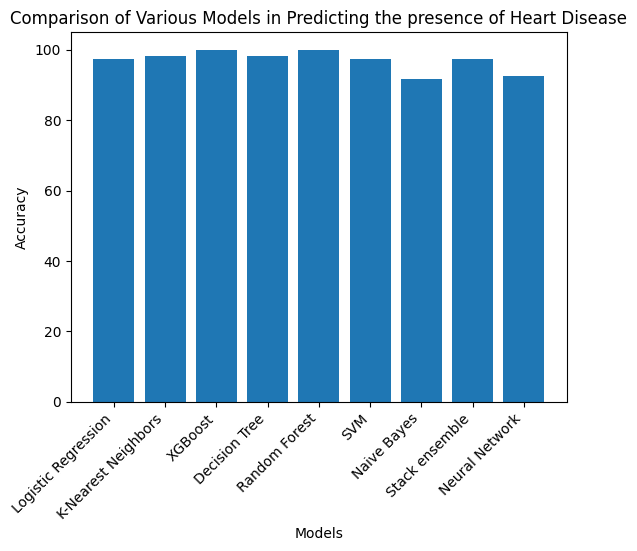

The accuracy score achieved using Logistic Regression is: 97.5 %
The accuracy score achieved using K-Nearest Neighbors is: 98.33 %
The accuracy score achieved using XGBoost is: 100.0 %
The accuracy score achieved using Decision Tree is: 98.33 %
The accuracy score achieved using Random Forest is: 100.0 %
The accuracy score achieved using SVM is: 97.5 %
The accuracy score achieved using Naive Bayes is: 91.67 %
The accuracy score achieved using Stack ensemble is: 97.5 %
The accuracy score achieved using Neural Network is: 92.5 %


In [134]:
#for display purposes, only the best model of each type shall be displayed
model = ['Logistic Regression', 'K-Nearest Neighbors', 'XGBoost', 'Decision Tree',
         'Random Forest', 'SVM', 'Naive Bayes', 'Stack ensemble', 'Neural Network']
accs = [lr_norm_acc, knn_norm_acc, xgb_acc, dt_acc, rf_acc, svm_norm_acc, nb_acc, stack_acc, nn_acc]

#display bar graph
plt.bar(model, accs)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Accuracy')
plt.xlabel('Models')
plt.title('Comparison of Various Models in Predicting the presence of Heart Disease')
plt.show()

#outputting actual accuracies below graph
for i in range(len(model)):
    print(f"The accuracy score achieved using {model[i]} is: {accs[i]} %")

# XII. Saving models for external use

In [138]:
#choosing which model to use to predict chances of having CKD based on patiient data
import pickle
# Assuming 'model' is your trained ML model
with open('ckd_model.pkl', 'wb') as f:
  pickle.dump(xgb_model, f)